In [37]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Image Processing: Iceberg or Ship





## Project     : Final Project
## Student Name: Madhuri Kalani
## Email ID    : Madhuri.Kalani@gmail.com
## Date        : '2018-06-27'


## Business Problem: 

#### Drifting icebergs present threats to navigation and activities in areas such as offshore of the East Coast of Canada. 
#### Currently, many institutions and companies use aerial reconnaissance and shore-based support to monitor environmental conditions and assess risks from icebergs.  
#### However, in remote areas with particularly harsh weather, these methods are not feasible, and the only viable monitoring option is via satellite. 

## Objective:

#### The purpose is to identify if a remotely sensed target is a ship or iceberg and find out which features will be most helpful for doing classification.  
#### I will have to explore a variety of transformation techniques to better understand how ships and icebergs reflect light and will try to use these insights to distinguish the images. 

## Background

#### This project processes synthetic-aperture radar images and uses machine learning to identify whether each image contains a ship or an iceberg.

#### Synthetic aperture radar (SAR) images are captured from a moving antenna emitting successive pulses of radio waves. Institutions mount these antenna on unmanned aerial reconnaissance vessels to surveil land areas.

#### The images in this case study were collected from the Sentinel-1 satelite constillation, orbitting 600 kilometers above the earth. The Sentinel-1 is a side looking radar (SLAR), which means that the radar points in a direction perpendicular to the direction of flight.

#### The Sentinel-1 transmits and receives energy in two channels: a vertical channel and a horizontal channel. 

#### These separate channels will help when analyzing the images because different objects have different polarimetric scattering features. 

<img src='https://storage.googleapis.com/kaggle-media/competitions/statoil/lhYaHT0.png'>


#### I will explore a variety of transformation techniques to better understand how ships and icebergs reflect light and use these insights to distinguish our images.

#### The purpose is to do some analysis and find out which features will be most helpful for doing classification.


## Import Packages 

In [1]:
# Data Manipulation
import pandas as pd
pd.options.display.max_columns = 25
import numpy as np
from IPython.display import display

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as plb
import seaborn as sns  # might have to install pip install seaborn
sns.set_style("whitegrid", {"axes.grid": False})
import missingno as msno  # might have to install pip install missingno
import cv2  # might have to install pip install cv2
from scipy import signal


## Loading the Data

In [8]:

train = pd.read_json('data/train.json')
train = pd.DataFrame(train)
train.info()
display(train.head())
train.describe()
display(train.inc_angle.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 5 columns):
band_1        1604 non-null object
band_2        1604 non-null object
id            1604 non-null object
inc_angle     1604 non-null object
is_iceberg    1604 non-null int64
dtypes: int64(1), object(4)
memory usage: 62.7+ KB


,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


count     1604
unique     879
top         na
freq       133
Name: inc_angle, dtype: object

### Observations

#### As you can see there are 133 missing values in inc_angle

### Font Size Controls for Plotting

In [182]:

SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Handling Missing values 

count    1471.000000
mean       39.268707
std         3.839744
min        24.754600
25%        36.106100
50%        39.501500
75%        42.559100
max        45.937500
Name: inc_angle, dtype: float64

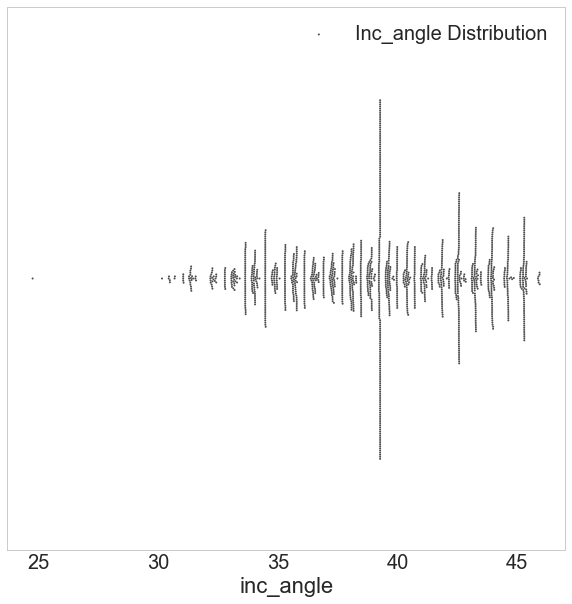

In [184]:
train.replace('na', np.NaN, inplace=True)
train['inc_angle'] = pd.to_numeric(train['inc_angle'])
train.inc_angle.describe()
plt.figure(figsize=(10,10))
sns.swarmplot(x="inc_angle", data=train_df, size=2, color=".3", linewidth=0, label="Inc_angle Distribution")
plt.legend()


### Showing Missing Values

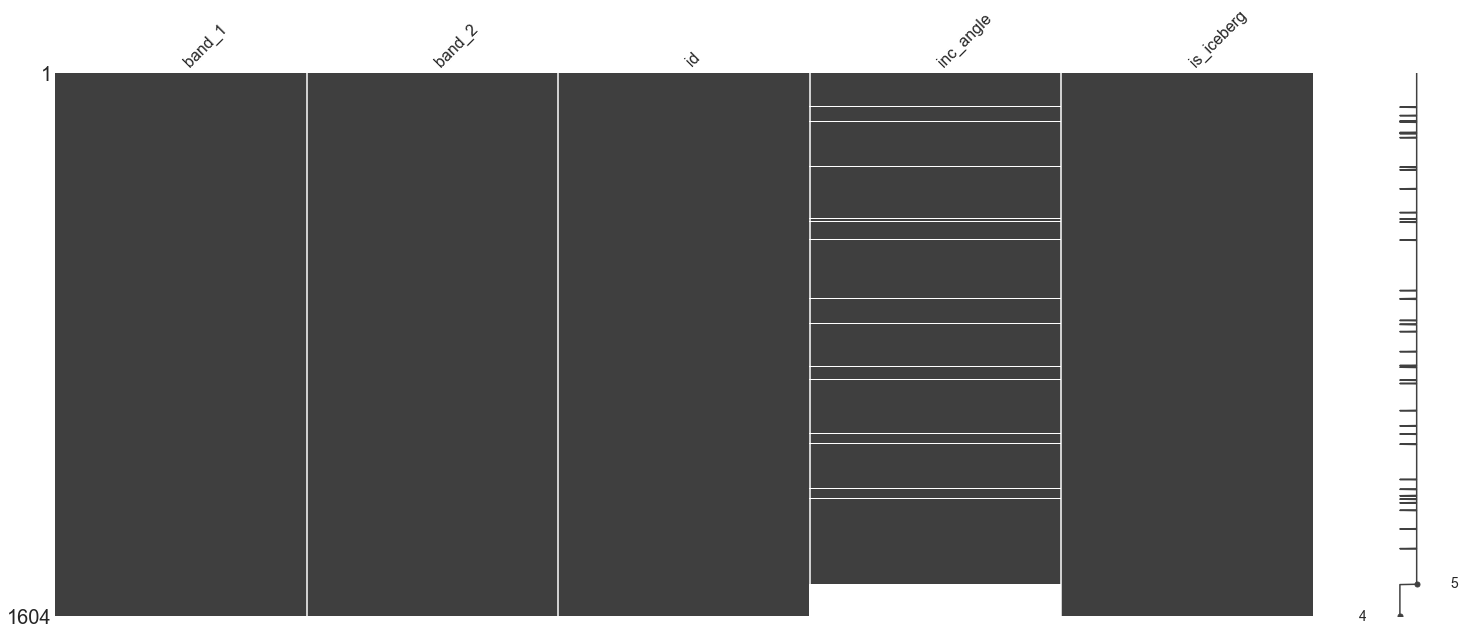

In [185]:
msno.matrix(train)

## Data Visualization

### Let's visualize the data to gain a new perspective. 


### Class Distribution

#### I can see from the plot below that there are more ships than icebergs in our dataset but still the class is not unbalanced.

([<matplotlib.patches.Wedge at 0x1bd68f64cf8>,
 [Text(-0.346685,0.927313,'Ship'), Text(0.381704,-1.02098,'Iceberg')],
 [Text(-0.189101,0.505807,'53.05%'), Text(0.22412,-0.599475,'46.95%')])

Text(0.5,1,'Class Distribution: Ship or Iceberg')

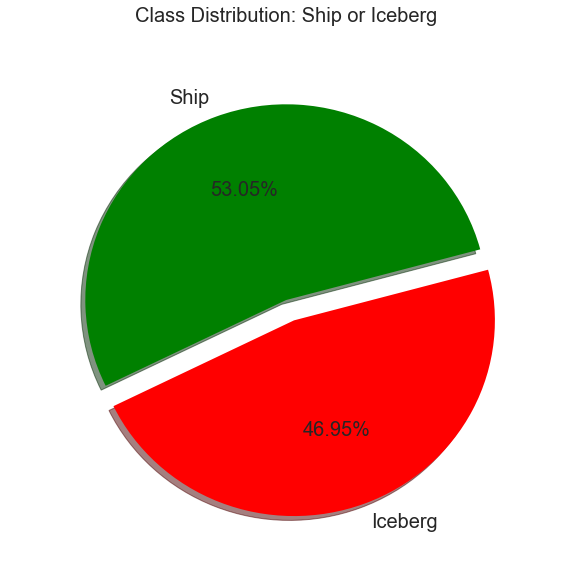

In [186]:
count_iceberg = train.is_iceberg.value_counts()
plt.figure(figsize=(10,10))
b= plb.round_(count_iceberg.values)
c=['green','red']
e=[0,0.1]
l = 'Ship','Iceberg'
plb.pie(b, explode= e, labels=l, colors=c, radius=.9, autopct='%1.2f%%', shadow=True, startangle=15)
#plt.xticks(range(2), ['Ships', 'Icebergs'])
plt.title('Class Distribution: Ship or Iceberg')
plt.show()


### Density Distribution using Backscattering 

#### Backscatter (or backscattering) is the reflection of waves, particles, or signals back to the direction from which they came. 
#### It is a diffuse reflection due to scattering, as opposed to specular reflection as from a mirror.


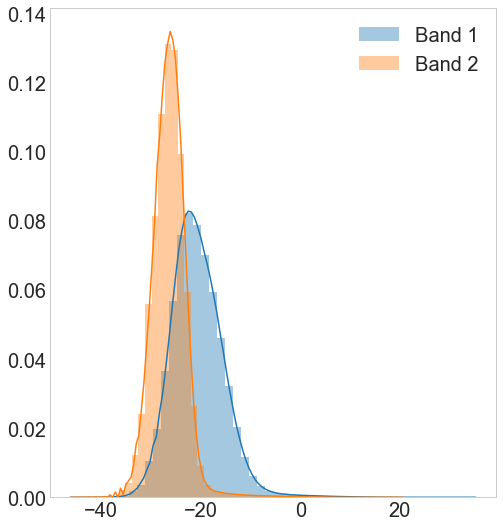

In [187]:
plt.figure(figsize=(8,9))
tBand1 = []
tBand2 = []
for imgvec in train['band_1']:
    for db in imgvec:
        tBand1.append(db)
for imgvec in train['band_2']:
    for db in imgvec:
        tBand2.append(db)
sns.distplot(tBand1, label='Band 1')
sns.distplot(tBand2, label='Band 2')
plt.legend()
plt.show()

## Data Cleansing

### Defining a function to clean the training data set. I will call this function again for Test dataset.

In [188]:
def clean_df(df):
    df['inc_angle'] = df['inc_angle'].replace("na", np.nan, inplace=False).astype(float)
    mean_inc_angle = df['inc_angle'].dropna(inplace=False).mean()
    df['inc_angle'] = df['inc_angle'].fillna(mean_inc_angle)
    df['band_1'] = df['band_1'].astype(list)
    df['band_2'] = df['band_2'].astype(list)
    return df
train_df = clean_df(train)

#traindf = train_df.sample(16)
#traindf


### Inc_angle Distribution for Iceberg and Ship

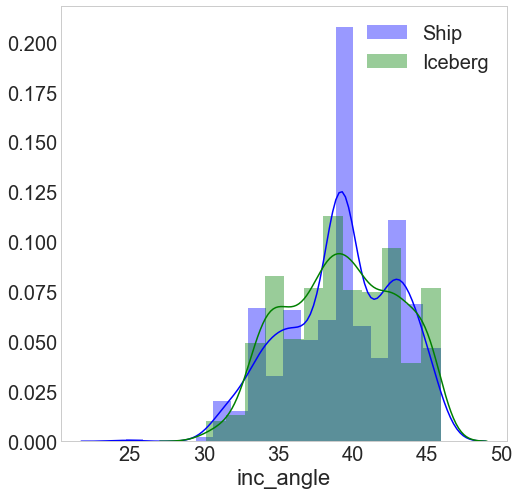

In [189]:
angle_count  = train_df.inc_angle.value_counts()
plt.figure(figsize=(8,8))
sns.distplot(
    train_df[train_df.is_iceberg==0].inc_angle,
    color='b', label='Ship'
)
sns.distplot(
    train_df[train_df.is_iceberg==1].inc_angle, color='g', label='Iceberg'
)
plt.legend()
plt.show()

### Observation
#### Inc_angle for Iceberg has more variance

### Frequency Distribution of Inc_Angle for Iceberg and Ship

851

(array([  1.,   0.,   4.,  53.,  80., 116., 235.,  95., 164., 103.]),
 array([24.7546 , 26.87289, 28.99118, 31.10947, 33.22776, 35.34605,
        37.46434, 39.58263, 41.70092, 43.81921, 45.9375 ]),
 <a list of 10 Patch objects>)

(array([ 10.,  19.,  93.,  75.,  84., 120., 112.,  96.,  61.,  83.]),
 array([30.1586, 31.7355, 33.3124, 34.8893, 36.4662, 38.0431, 39.62  ,
        41.1969, 42.7738, 44.3507, 45.9276]),
 <a list of 10 Patch objects>)

Text(0.5,1,'Ship')

Text(0.5,1,'Iceberg')

Text(0.5,0,'Incident Angle')

Text(0.5,0,'Incident Angle')

Text(0,0.5,'Count')

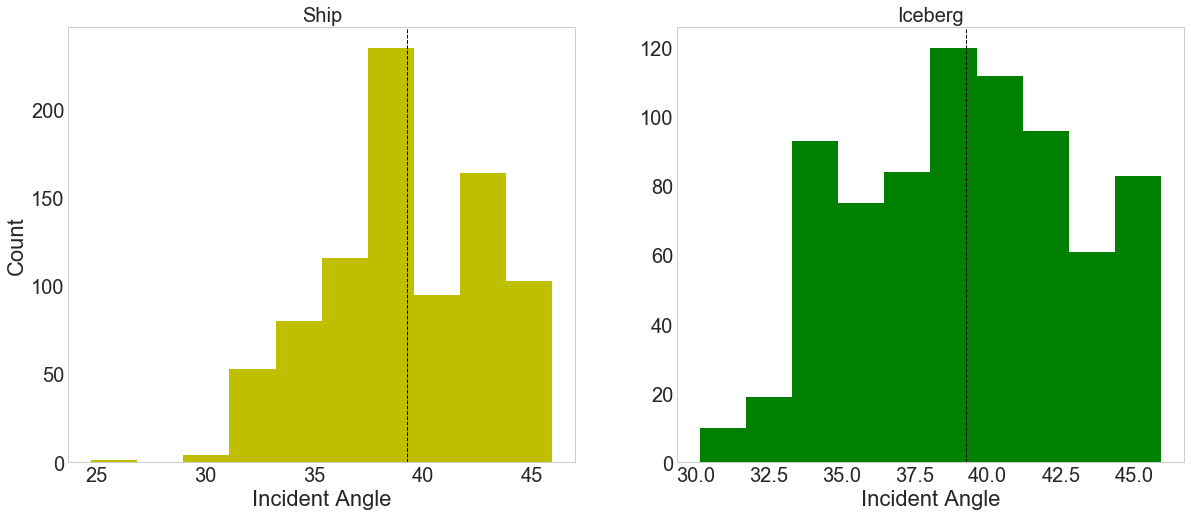

In [190]:

angle_count  = train.inc_angle.value_counts()
plt.figure(figsize=(8,8))
f,(ax1,ax2)=plt.subplots(1,2,figsize=(20,8))

len(train_df[train_df.is_iceberg==0])
ax1.axvline(np.asarray(train_df[train_df.is_iceberg==0].inc_angle).mean(), color='k', linestyle='dashed', linewidth=1)
ax1.hist(np.asarray(train_df[train_df.is_iceberg==0].inc_angle), color='y', label='Iceberg')
ax2.axvline(np.asarray(train_df[train_df.is_iceberg==1].inc_angle).mean(), color='k', linestyle='dashed', linewidth=1)
ax2.hist(np.asarray(train_df[train_df.is_iceberg==1].inc_angle),color='g', label='Ship')
ax1.set_title('Ship')
ax2.set_title('Iceberg')
ax1.set_xlabel('Incident Angle')
ax2.set_xlabel('Incident Angle')
ax1.set_ylabel('Count')
plt.show()

## Image Processing

### Defining a function to show band_1 and band_2 images from the training data set

In [191]:
sample_band1 = train_df['band_1']
sample_band2 = train_df['band_2']
def data_prep(train_sample,i):
    band_ex = train_sample.loc[i,]
    band_ex = np.array(band_ex)
    band_square = band_ex.reshape(75, 75)
    return(band_square)

In [192]:
def img_show(train_sample):
    fig = plt.figure(1,figsize=(15,15))
    for i in range(9):
        ax = fig.add_subplot(3,3,i+1)
        band_square = data_prep(train_sample,i)
        ax.imshow(band_square)
        titles = ['Ship','Iceberg']
        ax.set_title('Image of %s' % titles[train_df.is_iceberg[i]])
    
    plt.show()

#### Showing Band_1 Images
##### Band_1 ---  Vertical

Displaying Band_1 Images


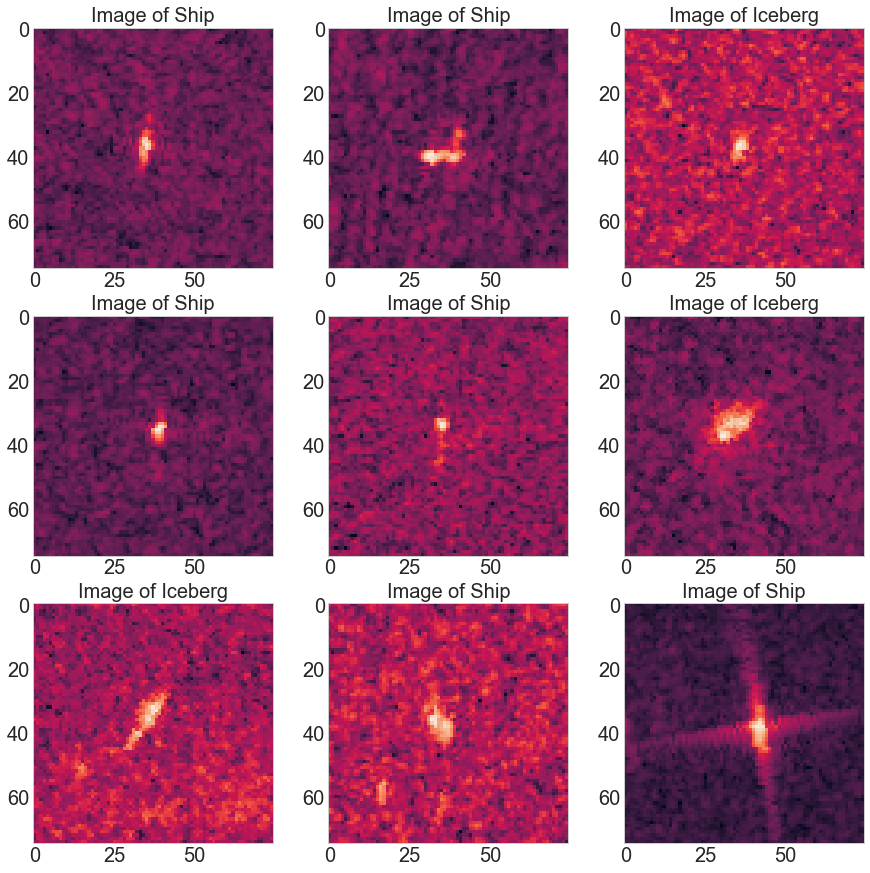

In [193]:
print("Displaying Band_1 Images")
img_show(sample_band1)

#### Showing Band_2 Images
##### Band_2 ---  Horizontal

In [ ]:
print("Displaying Band_2 Images")
img_show(sample_band2)


### Filtering - Noise Reduction

#### Defining a function to reduce noise

In [158]:

def noise_red(train_sample):
    fig = plt.figure(1,figsize=(15,15))
    for i in range(9):
        ax = fig.add_subplot(3,3,i+1)
        band_square = data_prep(train_sample,i)
        tt= np.uint8((255. - 0) / (band_square.max() - band_square.min()) * (band_square - band_square.min()) + band_square.min())
        blur = cv2.GaussianBlur(tt, (75, 75), 2)

        _,th3 = cv2.threshold(blur,0,255,cv2.THRESH_TOZERO+cv2.THRESH_OTSU)
    
        titles = ['Ship','Iceberg']
        plt.imshow(th3,cmap='jet')
        ax.set_title(titles[train_df.is_iceberg[i]])        
    plt.show()


### Filtering Noise from Band_1
##### Band_1 ---  Vertical

Reducing Noise from Band_1 Images


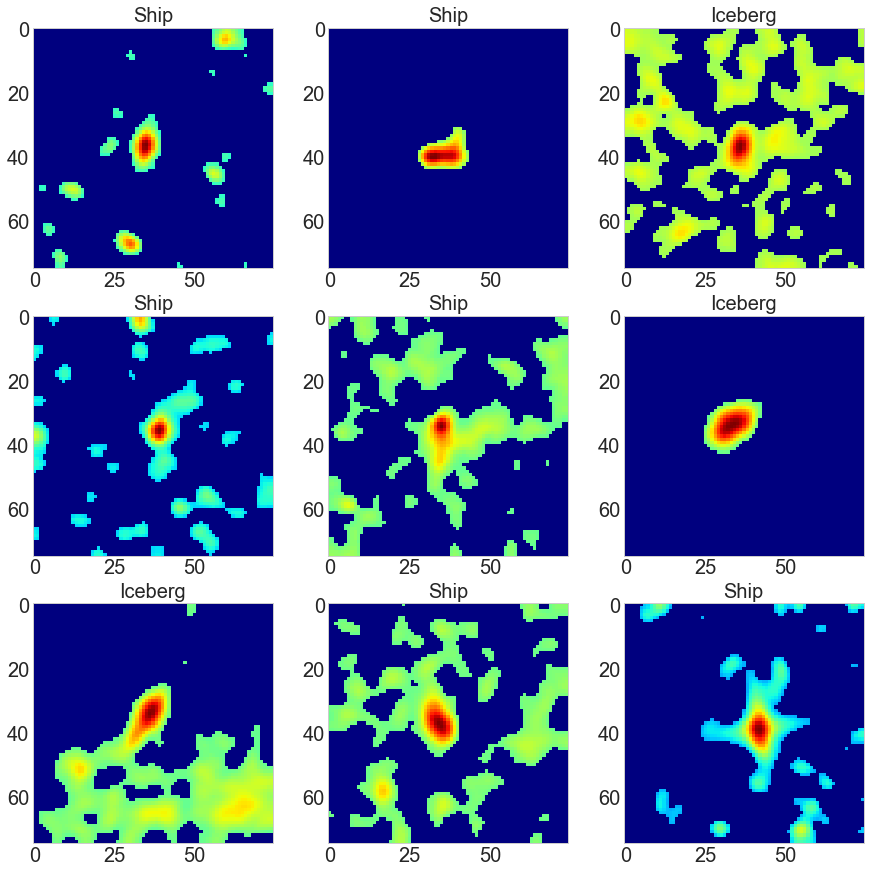

In [159]:
# Band 1
print("Reducing Noise from Band_1 Images")
noise_red(sample_band1)


### Filtering Noise from Band_2
### Band_2 ---  Horizontal


Reducing Noise from Band_2 Images


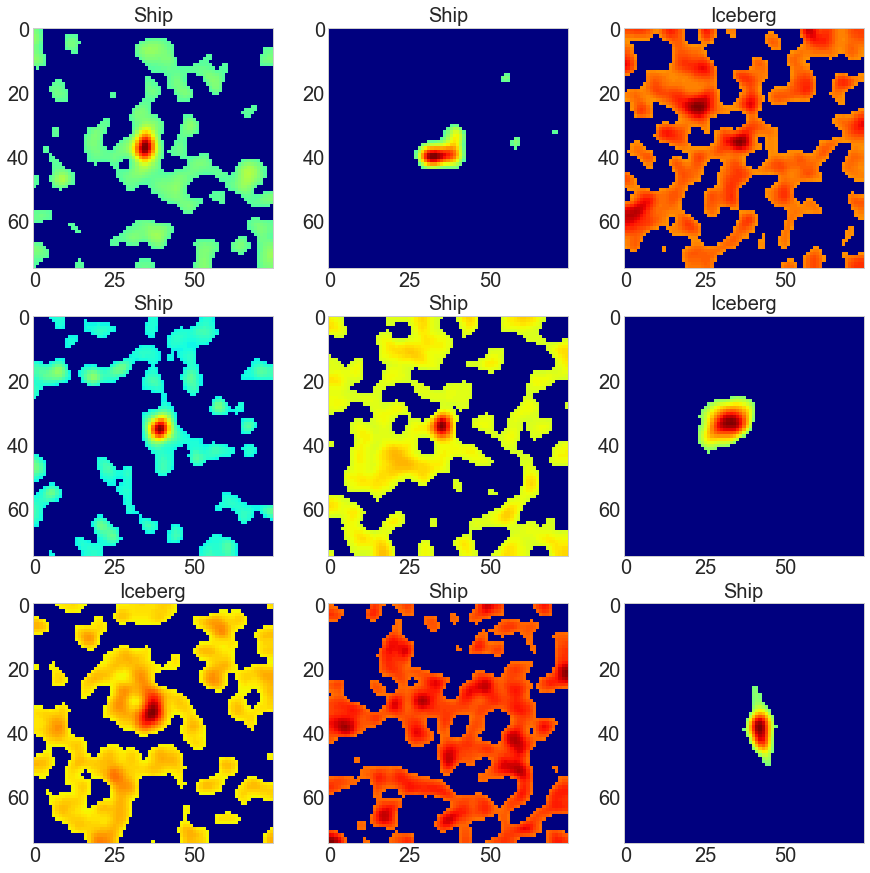

In [160]:
# Band 2

print("Reducing Noise from Band_2 Images")
noise_red(sample_band2)

### Observations

### 1. Band-2 images seem to have more noise than Band-1 images on an average

### 2. Iceberg images seem to have more intensity deviation than the ship ones on an average

### (like an iceberg may have small parts floating around while the ship is a single-blob)

### Edge Detection

#### An X-derivative will typically be antisymmetric with respect to reversing the values around the x-axis. 
#### This will provide some level of edge detection in the x-direction. 

In [161]:


def edge_detect(train_sample):
    xder = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    yder = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    fig = plt.figure(1,figsize=(15,15))
    for i in range(9):
        ax = fig.add_subplot(3,3,i+1)
        band_square = data_prep(train_sample,i)
        arr = signal.convolve2d(band_square,xder,mode='valid')
        ax.imshow(arr,cmap='inferno')
        titles = ['Ship','Iceberg']
        ax.set_title('X-derivative of %s' % titles[train_df.is_iceberg[i]])
    
    plt.show()

#### Edge Detection for Band_1

##### Band_1 ---  Vertical

Edge Detection for Band_1 Images


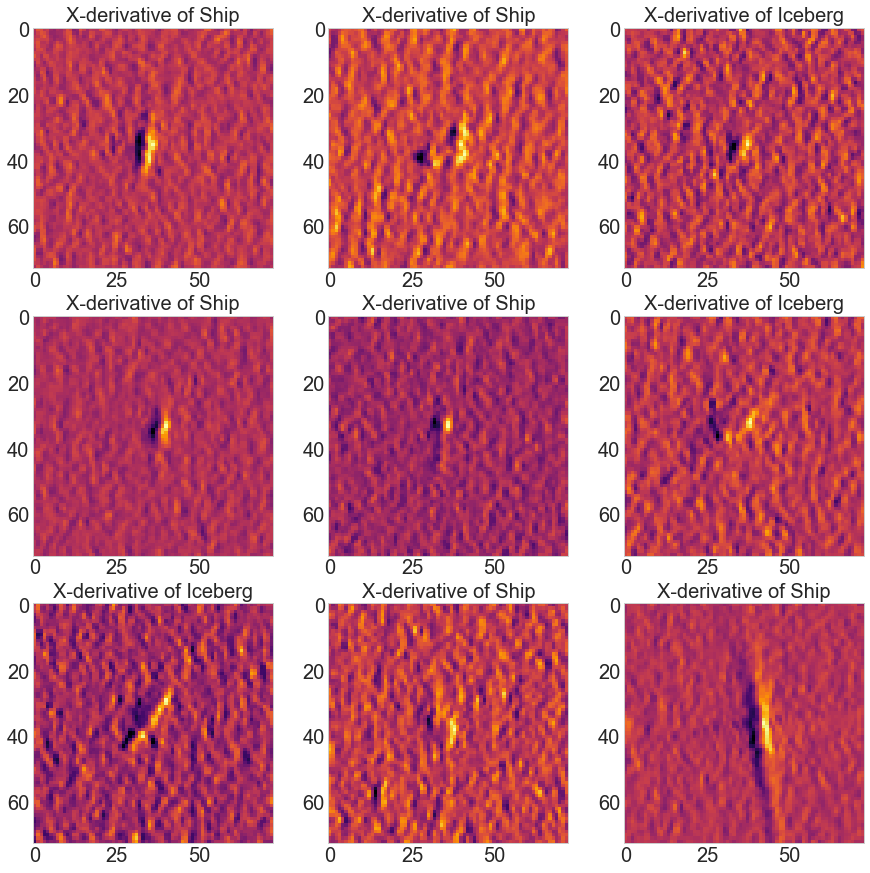

In [162]:
# Band 1

print("Edge Detection for Band_1 Images")
edge_detect(sample_band1)


#### Edge Detection for Band_2
##### Band_2 ---  Horizontal

Edge Detection for Band_2 Images


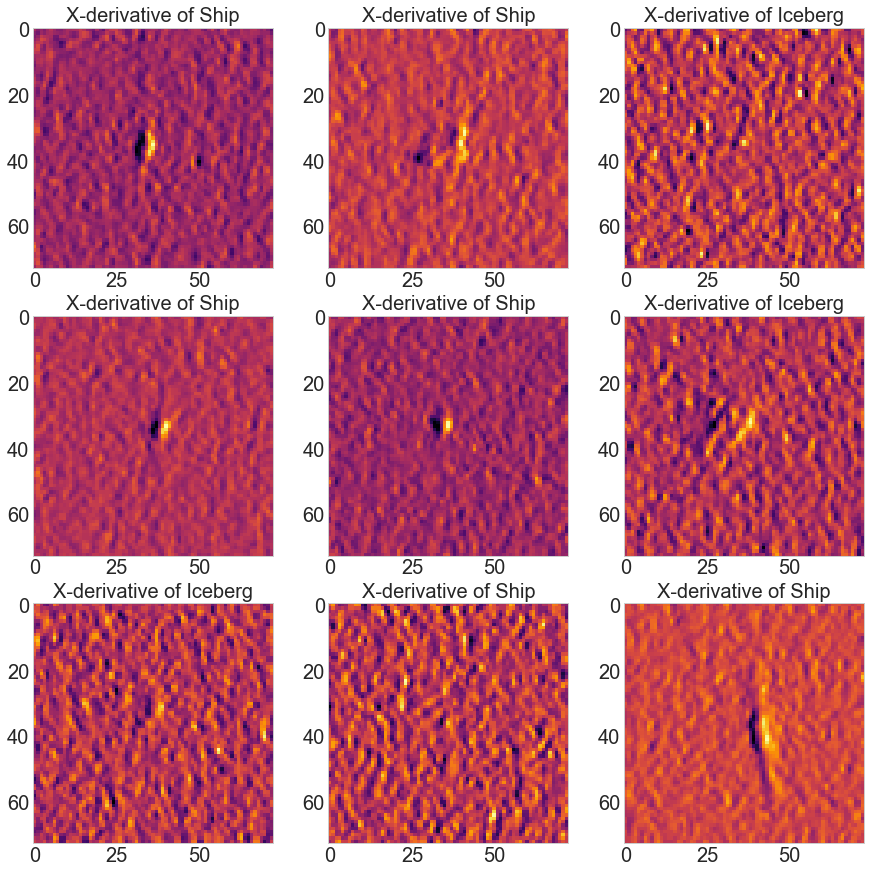

In [163]:
# Band 2

print("Edge Detection for Band_2 Images")
edge_detect(sample_band2)

### Gradient Magnitude of X- and Y- Derivative
#### Treating the x and y derivatives as a gradient vector at each position and then taking the magnitude at each point.



In [166]:

def grad_magn(train_sample):
    xder = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    yder = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    fig = plt.figure(1,figsize=(15,15))
    for i in range(9):
        ax = fig.add_subplot(3,3,i+1)
        band_square = data_prep(train_sample,i)
        arrx = signal.convolve2d(band_square,xder,mode='valid')
        arry = signal.convolve2d(band_square,yder,mode='valid')
        ax.imshow(np.hypot(arrx,arry),cmap='inferno')
        titles = ['Ship','Iceberg']
        ax.set_title(' %s' % titles[train_df.is_iceberg[i]])
    plt.show()

#### Gradient Magnitude for Band_1
##### Band_1 ---  Vertical

Gradient Magnitude for Band_1 Images


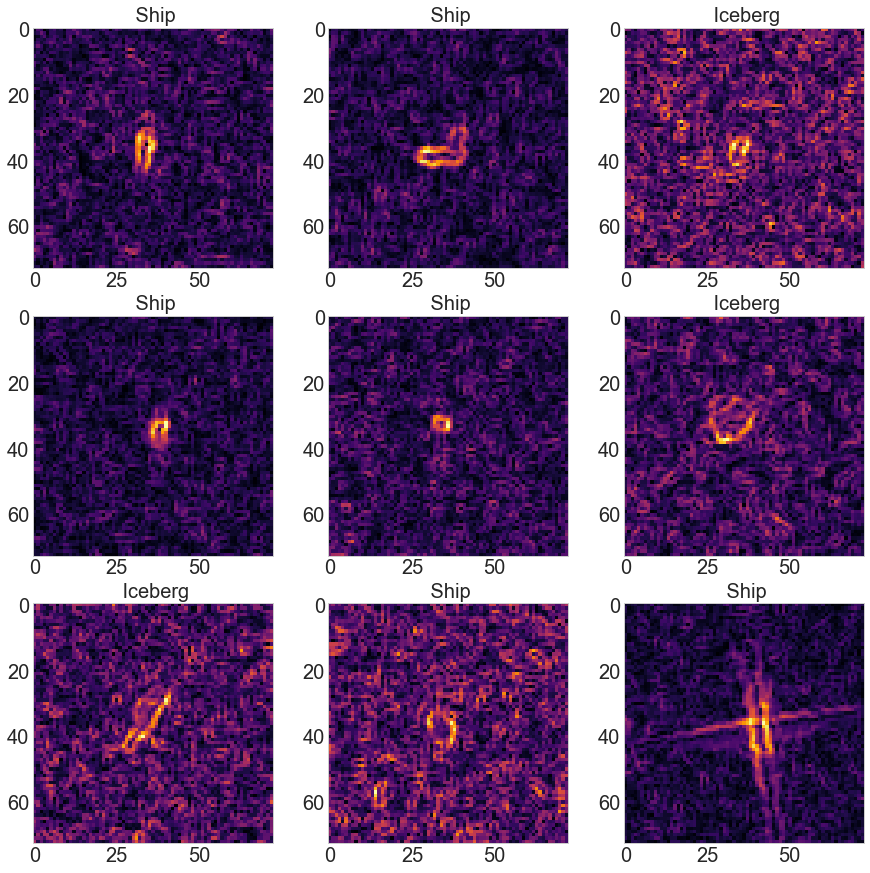

In [167]:

print("Gradient Magnitude for Band_1 Images")
grad_magn(sample_band1)

#### Gradient Magnitude for Band_2
##### Band_2 ---  Horizontal

Gradient Magnitude for Band_2 Images


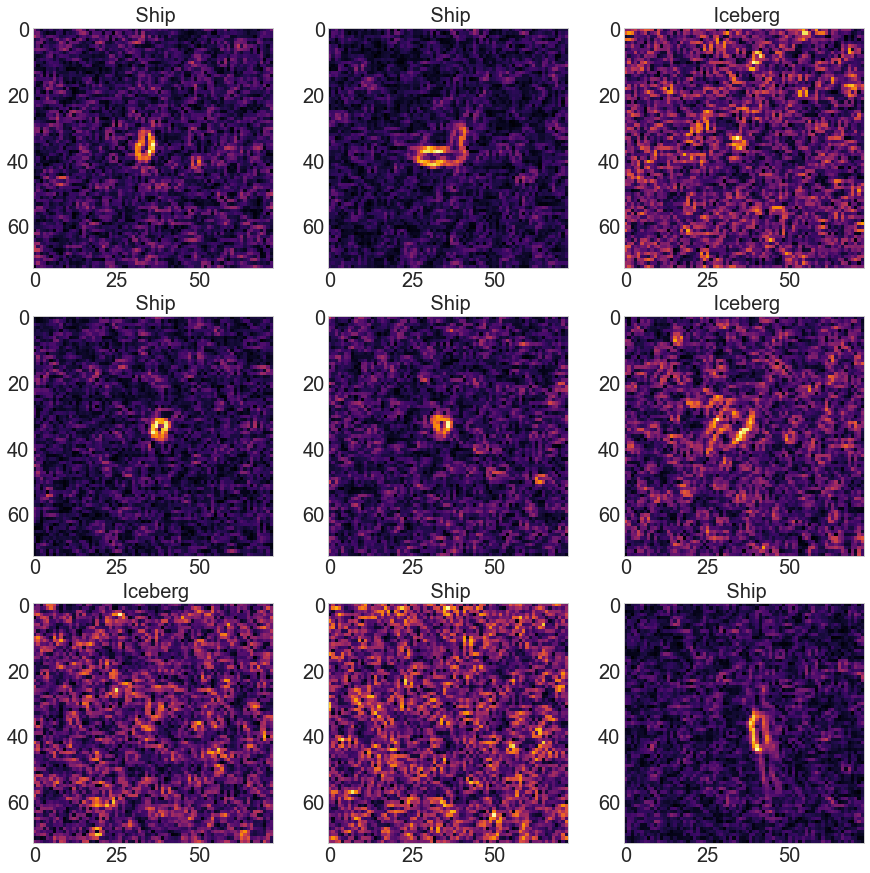

In [168]:

print("Gradient Magnitude for Band_2 Images")
grad_magn(sample_band2)

### Observations

#### I see interesting circular shapes everywhere in these images and the signals look fairly strong. 
#### The ships, in particular, show fairly bright edges and most create nice loops. 
#### This operation might be useful to put into a more advanced model like a neural net.
#### It would be good to compare the results with the original images

In [172]:
def image_fltr(train_sample):
    xder = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    yder = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    fig = plt.figure(1,figsize=(15,15))
    for i in range(16):
        ax = fig.add_subplot(4,4,i+1)
        band_square = data_prep(train_sample,i)
        tt= np.uint8((255. - 0) / (band_square.max() - band_square.min()) * (band_square - band_square.min()) + band_square.min())
        blur = cv2.GaussianBlur(tt, (75, 75), 2)

        _,th3 = cv2.threshold(blur,0,255,cv2.THRESH_TOZERO+cv2.THRESH_OTSU)
        arrx = signal.convolve2d(th3,xder,mode='valid')
        arry = signal.convolve2d(th3,yder,mode='valid')
        titles = ['Ship','Iceberg']
        ax.imshow(np.hypot(arrx,arry),cmap='inferno')
        plt.title(titles[train_df.is_iceberg[i]])
        
    plt.show()

Filtered Image for Band_1 Images


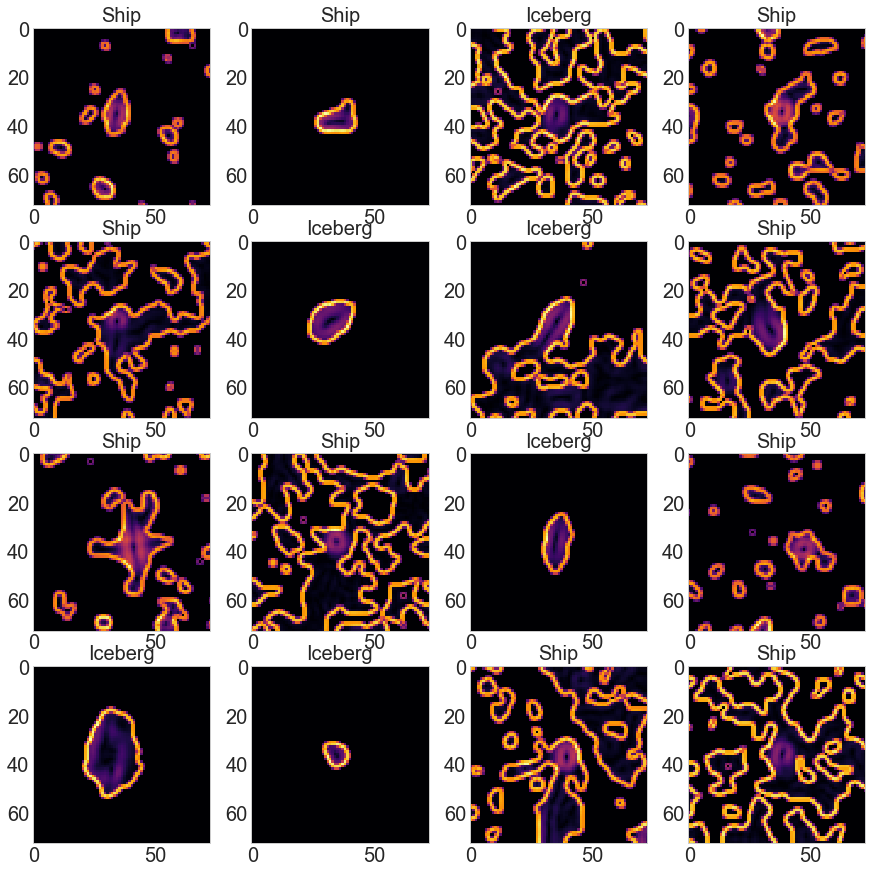

In [178]:

print("Filtered Image for Band_1 Images")
image_fltr(sample_band1)


Filtered Image for Band_1 Images


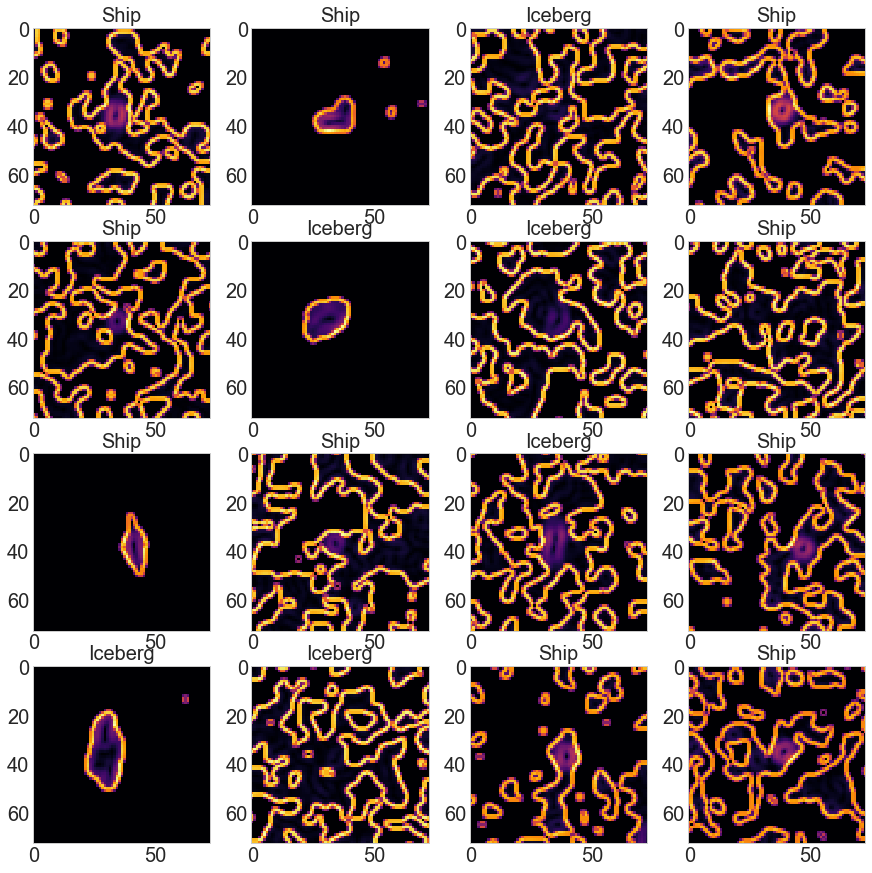

In [177]:
print("Filtered Image for Band_1 Images")
image_fltr(sample_band2)

## Next Steps and Conclusion

### This was a fun exploration into image recognition using SAR images. There is still a lot to explore here. Development on this project will continue over time.
### I will use Logistic Regression, Random Forest, and more advanced algorithms (convolutional neural nets) to improve the accuracy.

